## Инструменты для работы с языком 

## Задача: классификация твитов по тональности

У нас есть датасет из твитов, про каждый указано, как он эмоционально окрашен: положительно или отрицательно. Задача: предсказывать эмоциональную окраску.

Скачиваем куски датасета ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv).

In [2]:
# если у вас линукс / мак / collab или ещё какая-то среда, в которой работает wget, можно так:
!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv

/bin/bash: /home/ekaterina/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-12-07 18:20:36--  https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
Распознаётся www.dropbox.com (www.dropbox.com)… 162.125.70.18, 2620:100:6026:18::a27d:4612
Подключение к www.dropbox.com (www.dropbox.com)|162.125.70.18|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: /s/raw/fnpq3z4bcnoktiv/positive.csv [переход]
--2023-12-07 18:20:38--  https://www.dropbox.com/s/raw/fnpq3z4bcnoktiv/positive.csv
Повторное использование соединения с www.dropbox.com:443.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://uce948adabe3a7c45a1c10cea9a1.dl.dropboxusercontent.com/cd/0/inline/CI8LAfiMKmsUWjWHWtw8tUVyYbTRNqbaOAAuO_96R5a3WN9Wr8_7jkYQUp-WWS2I3ASNvsDvDYOSJjiTiT5n_k8duGeQuk4zsFSuzBeS9oEElXkdVISQRNgAHOKhExcuHAY/file# [переход]
--2023-12-07 18:20:38--  https://uce948adabe3a7c45a1c10cea9a1.dl.dropboxusercontent.com/cd/0/inli

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [4]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = positive.append(negative)

/tmp/ipykernel_4334/3125191635.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = positive.append(negative)


In [5]:
df.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


In [6]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

## Baseline: классификация необработанных n-грамм

### Векторизаторы

In [7]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
from nltk import ngrams

In [9]:
sent = 'Если б мне платили каждый раз'.split()
list(ngrams(sent, 1)) # униграммы

[('Если',), ('б',), ('мне',), ('платили',), ('каждый',), ('раз',)]

In [10]:
list(ngrams(sent, 2)) # биграммы

[('Если', 'б'),
 ('б', 'мне'),
 ('мне', 'платили'),
 ('платили', 'каждый'),
 ('каждый', 'раз')]

In [11]:
list(ngrams(sent, 3)) # триграммы

[('Если', 'б', 'мне'),
 ('б', 'мне', 'платили'),
 ('мне', 'платили', 'каждый'),
 ('платили', 'каждый', 'раз')]

In [12]:
list(ngrams(sent, 5)) # ... пентаграммы?

[('Если', 'б', 'мне', 'платили', 'каждый'),
 ('б', 'мне', 'платили', 'каждый', 'раз')]

In [13]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train) # bow -- bag of words (мешок слов)

In [14]:
list(vec.vocabulary_.items())[:10]

[('sashasatira', 76325),
 ('да', 122940),
 ('это', 241611),
 ('жесть', 131492),
 ('какая', 142653),
 ('то', 222177),
 ('на', 161753),
 ('меня', 157605),
 ('никак', 168134),
 ('не', 165394)]

In [15]:
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)

/home/ekaterina/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [16]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.76      0.76      0.76     28177
    positive       0.76      0.76      0.76     28532

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



Попробуем сделать то же самое для триграмм:

In [17]:
vec = CountVectorizer(ngram_range=(3, 3))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/home/ekaterina/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.46      0.72      0.56     18148
    positive       0.82      0.61      0.70     38561

    accuracy                           0.65     56709
   macro avg       0.64      0.66      0.63     56709
weighted avg       0.71      0.65      0.66     56709



Kомбинации триграмм встречаются намного реже, чем униграммы, поэтому модель хуже обучается. Для целей повышения качества обучения нужно использовать комбинации из униграмм, биграмм и триграмм. Тогда учитываются и отдельные слова, и контекст (комбинации).

## TF-IDF векторизация

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.73      0.77      0.75     26766
    positive       0.78      0.75      0.76     29943

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



## PMI

Оценим важность биграмм в нашем обучающем корпусе.

In [21]:
import nltk
from nltk import collocations 
nltk.download('genesis')

print(type(nltk.corpus.genesis.words('english-web.txt')))
bigram_measures = collocations.BigramAssocMeasures()
# bigram_finder.apply_freq_filter(5)
bigram_finder = collocations.BigramCollocationFinder.from_documents([nltk.word_tokenize(x) for x in x_train])
bigrams = bigram_finder.nbest(bigram_measures.pmi, 100)
print(bigrams)

[nltk_data] Downloading package genesis to
[nltk_data]     /home/ekaterina/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


<class 'nltk.corpus.reader.util.StreamBackedCorpusView'>
[('+Никита', '=полностью'), ('+СОННО', '+НЕ'), ('+живіт', 'болить.ну'), (',4', 'запирайте'), ('-/////', 'прбрм-прбрм'), ('-10,11', 'болсо'), ('-163', '-КРАСНЫЙ'), ('-165', '-СИНИЙ'), ('-53', 'dBm'), ('-700', 'рублей.-А'), ('-800', 'нахууй'), ('-S', 'console'), ('-АХАХАХАХ', 'ЮБКУ'), ('-АХАХАХАХХАХАХАХАХАХХА', '-АХАХАХХАХАХАХАХАХ'), ('-Айгуль', 'Маратовна'), ('-Аха', 'спетросянил'), ('-Без', 'презерватива'), ('-ВАХАХАХА', 'СТИПЕНДИЯ'), ('-Вам', 'завернуть'), ('-Весело', 'кншн:3'), ('-Восьмигрудый', 'трипи'), ('-Время', 'эмокора'), ('-Выздоравливай', 'педрилк'), ('-ГНИДОТА', '-Над'), ('-ДЕТЕЙ', 'НАКРЫЛО'), ('-Дирол', 'Сенсес'), ('-Домашка', '-кл.час'), ('-ЖАРЕНЫЙ', 'КАРТОФЕЛЬ'), ('-ЗАШЛА', 'ОДЕЛА'), ('-КРАСНЫЙ', '-ЧЕРНЫЕ'), ('-Керем', 'севгили'), ('-Маладец', '-Лол'), ('-НА', 'РЕАЛЬНЫХ'), ('-НАЧИНАЕТ', 'БЕСИТЬ'), ('-ОЗВУЧИВАТЕЛЬ', 'МУЛЬТИКОВ'), ('-ОНИ', 'СТОЯТ'), ('-Плохое', 'пищеварение'), ('-Поэзия', 'заключает'), ('-ПриФетиГг', 

In [154]:
bigrams = bigram_finder.nbest(bigram_measures.likelihood_ratio, 100)
print(bigrams)

[('(', '('), ('RT', '@'), (')', ')'), ('http', ':'), ('!', '!'), (':', 'D'), ('у', 'меня'), (':', '('), (',', 'а'), (',', 'что'), (',', 'но'), (')', 'http'), ('*', '*'), ('у', 'нас'), ('(', ','), (':', ')'), (':', '-'), (',', '('), ('не', 'могу'), (',', ')'), ('?', '?'), (')', ','), (',', ':'), ('@', '('), (',', ','), ('(', ':'), (':', ','), ('@', ')'), ('&', 'lt'), ('@', ','), ('со', 'мной'), ('@', ':'), (':', ':'), ('(', '@'), (':', '*'), ('новый', 'год'), (';', ')'), ('gt', ';'), ('не', 'знаю'), (')', ':'), (',', '@'), ('У', 'меня'), ('а', 'я'), ('@', '@'), (',', 'когда'), ('сих', 'пор'), ('lt', ';'), ('потому', 'что'), ('&', 'gt'), ('у', 'тебя'), (';', '('), ('все', 'равно'), ('с', 'тобой'), (',', 'как'), ('в', 'школу'), (')', '@'), ('&', 'amp'), ('(', 'http'), ('Доброе', 'утро'), ('-', ')'), ('ничего', 'не'), ('Как', 'же'), (',', 'я'), (':', 'DD'), ('не', '('), ('я', 'не'), ('--', '--'), ('самом', 'деле'), ('не', ')'), ('до', 'сих'), ('amp', ';'), ('как', 'же'), ('об', 'этом'), ('

## Стоп-слова и пунктуация

In [155]:
# у вас здесь, вероятно, выскочит ошибка и надо будет загрузить стоп слова (в тексте ошибки написано, как)
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ekaterina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [156]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [157]:
noise = stopwords.words('russian') + list(punctuation)

In [158]:
vec = CountVectorizer(ngram_range=(1, 1), analyzer = 'word', stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/home/ekaterina/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.76      0.74      0.75     28453
    positive       0.75      0.76      0.75     28256

    accuracy                           0.75     56709
   macro avg       0.75      0.75      0.75     56709
weighted avg       0.75      0.75      0.75     56709



## Лемматизация

In [159]:
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /bin

/bin/bash: /home/ekaterina/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
--2023-12-06 22:55:11--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Распознаётся download.cdn.yandex.net (download.cdn.yandex.net)… 5.45.205.245, 5.45.205.241, 5.45.205.242, ...
Подключение к download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.245|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: http://cachev2-m9-16.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=35 [переход]
--2023-12-06 22:55:11--  http://cachev2-m9-16.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=35
Распознаётся cachev2-m9-16.cdn.yandex.net (cachev2-m9-16.cdn.yandex.net)… 37.9.117.103, 2a02:6b8:c35:6:0:562:0:28
Подключение к cachev2-m9-16.cdn.yandex.net (cachev2-m9-16.cdn.yandex.net)|37.9.117.103|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание отв

In [160]:
!pip install pymystem3

/bin/bash: /home/ekaterina/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [161]:
import pymystem3
from pymystem3 import Mystem
mystem_analyzer = Mystem()

In [162]:
example = 'мама сказала, что посмотрим, на счет посмотрим.'

In [163]:
print(mystem_analyzer.lemmatize(example))

['мама', ' ', 'сказать', ', ', 'что', ' ', 'посмотреть', ', ', 'на', ' ', 'счет', ' ', 'посмотреть', '.', '\n']


In [164]:
mystem_analyzer.analyze(example)

[{'analysis': [{'lex': 'мама', 'wt': 1, 'gr': 'S,жен,од=им,ед'}],
  'text': 'мама'},
 {'text': ' '},
 {'analysis': [{'lex': 'сказать',
    'wt': 1,
    'gr': 'V,сов,пе=прош,ед,изъяв,жен'}],
  'text': 'сказала'},
 {'text': ', '},
 {'analysis': [{'lex': 'что', 'wt': 0.688532576, 'gr': 'CONJ='}],
  'text': 'что'},
 {'text': ' '},
 {'analysis': [{'lex': 'посмотреть',
    'wt': 1,
    'gr': 'V,сов,пе=(непрош,мн,изъяв,1-л|мн,пов,1-л)'}],
  'text': 'посмотрим'},
 {'text': ', '},
 {'analysis': [{'lex': 'на', 'wt': 0.9989522965, 'gr': 'PR='}], 'text': 'на'},
 {'text': ' '},
 {'analysis': [{'lex': 'счет', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'счет'},
 {'text': ' '},
 {'analysis': [{'lex': 'посмотреть',
    'wt': 1,
    'gr': 'V,сов,пе=(непрош,мн,изъяв,1-л|мн,пов,1-л)'}],
  'text': 'посмотрим'},
 {'text': '.'},
 {'text': '\n'}]

In [165]:
import re
def my_preproc(text):
    text = re.sub('[{}]'.format(punctuation), '', text)
    text = mystem_analyzer.lemmatize(text)
    return [word for word in text if word not in stopwords.words('russian') + [' ', '\n']]

In [166]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=my_preproc)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/home/ekaterina/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.78      0.74      0.76     29107
    positive       0.74      0.77      0.76     27602

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



### [Pymorphy](http://pymorphy2.readthedocs.io/en/latest/)


In [167]:
!pip install pymorphy2

/bin/bash: /home/ekaterina/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [168]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

In [169]:
ana = pymorphy2_analyzer.parse(sent[3])
ana

[Parse(word='платили', tag=OpencorporaTag('VERB,impf,tran plur,past,indc'), normal_form='платить', score=1.0, methods_stack=((DictionaryAnalyzer(), 'платили', 2472, 10),))]

In [170]:
ana[0].normal_form

'платить'

### [Natasha](https://github.com/natasha/)

In [171]:
!pip install razdel

/bin/bash: /home/ekaterina/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [172]:
from razdel import tokenize

tokens = list(tokenize('Кружка-термос на 0.5л (50/64 см³, 516;...)'))
tokens

[Substring(0, 13, 'Кружка-термос'),
 Substring(14, 16, 'на'),
 Substring(17, 20, '0.5'),
 Substring(20, 21, 'л'),
 Substring(22, 23, '('),
 Substring(23, 28, '50/64'),
 Substring(29, 32, 'см³'),
 Substring(32, 33, ','),
 Substring(34, 37, '516'),
 Substring(37, 38, ';'),
 Substring(38, 41, '...'),
 Substring(41, 42, ')')]

In [173]:
[_.text for _ in tokens]

['Кружка-термос',
 'на',
 '0.5',
 'л',
 '(',
 '50/64',
 'см³',
 ',',
 '516',
 ';',
 '...',
 ')']

In [174]:
!pip install natasha

/bin/bash: /home/ekaterina/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [175]:
from natasha import Doc, MorphVocab, Segmenter, NewsEmbedding, NewsMorphTagger

segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

def natasha_lemmatize(text):
  doc = Doc(text)
  doc.segment(segmenter)
  doc.tag_morph(morph_tagger)
  for token in doc.tokens:
    token.lemmatize(morph_vocab)
  return {_.text: _.lemma for _ in doc.tokens}

In [176]:
text = 'Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. «Я не могу понять, как прославление тех, кто непосредственно принимал участие в ужасных антисемитских преступлениях, помогает бороться с антисемитизмом и ксенофобией. Украина не должна забывать о преступлениях, совершенных против украинских евреев, и никоим образом не отмечать их через почитание их исполнителей», — написал дипломат. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года). В июле аналогичное решение принял Житомирский областной совет. В начале месяца с предложением к президенту страны Петру Порошенко вернуть Бандере звание Героя Украины обратились депутаты Верховной Рады. Парламентарии уверены, что признание Бандеры национальным героем поможет в борьбе с подрывной деятельностью против Украины в информационном поле, а также остановит «распространение мифов, созданных российской пропагандой». Степан Бандера (1909-1959) был одним из лидеров Организации украинских националистов, выступающей за создание независимого государства на территориях с украиноязычным населением. В 2010 году в период президентства Виктора Ющенко Бандера был посмертно признан Героем Украины, однако впоследствии это решение было отменено судом. '

natasha_lemmatize(text)

{'Посол': 'посол',
 'Израиля': 'израиль',
 'на': 'на',
 'Украине': 'украина',
 'Йоэль': 'йоэль',
 'Лион': 'лион',
 'признался': 'признаться',
 ',': ',',
 'что': 'что',
 'пришел': 'прийти',
 'в': 'в',
 'шок': 'шок',
 'узнав': 'узнать',
 'о': 'о',
 'решении': 'решение',
 'властей': 'власть',
 'Львовской': 'львовский',
 'области': 'область',
 'объявить': 'объявить',
 '2019': '2019',
 'год': 'год',
 'годом': 'год',
 'лидера': 'лидер',
 'запрещенной': 'запретить',
 'России': 'россия',
 'Организации': 'организация',
 'украинских': 'украинский',
 'националистов': 'националист',
 '(': '(',
 'ОУН': 'оун',
 ')': ')',
 'Степана': 'степан',
 'Бандеры': 'бандера',
 '.': '.',
 'Свое': 'свой',
 'заявление': 'заявление',
 'он': 'он',
 'разместил': 'разместить',
 'Twitter': 'twitter',
 '«': '«',
 'Я': 'я',
 'не': 'не',
 'могу': 'мочь',
 'понять': 'понять',
 'как': 'как',
 'прославление': 'прославление',
 'тех': 'тот',
 'кто': 'кто',
 'непосредственно': 'непосредственно',
 'принимал': 'принимать',
 'уча

### mystem vs. pymorphy vs. natasha

In [177]:
homonym1 = 'За время обучения я прослушал больше сорока курсов.'
homonym2 = 'Сорока своровала блестящее украшение со стола.'

In [178]:
mystem_analyzer = Mystem() # инициализирую объект с дефолтными параметрами

print(mystem_analyzer.analyze(homonym1)[-5])
print(mystem_analyzer.analyze(homonym2)[0])

{'analysis': [{'lex': 'сорок', 'wt': 0.8710292664, 'gr': 'NUM=(пр|дат|род|твор)'}], 'text': 'сорока'}
{'analysis': [{'lex': 'сорока', 'wt': 0.1210970041, 'gr': 'S,жен,од=им,ед'}], 'text': 'Сорока'}


In [179]:
print(natasha_lemmatize(homonym1))

{'За': 'за', 'время': 'время', 'обучения': 'обучение', 'я': 'я', 'прослушал': 'прослушать', 'больше': 'большой', 'сорока': 'сорок', 'курсов': 'курс', '.': '.'}


In [180]:
print(natasha_lemmatize(homonym2))

{'Сорока': 'сорок', 'своровала': 'своровать', 'блестящее': 'блестящий', 'украшение': 'украшение', 'со': 'с', 'стола': 'стол', '.': '.'}


## Словарь, закон Ципфа и закон Хипса

Закон Ципфа -- эмпирическая закономерность: если все слова корпуса текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n. Иными словами, частотность слов убывает очень быстро.

In [492]:
from collections import Counter

In [493]:
corpus = [token for tweet in df.text for token in nltk.word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

2870536


['first_timee', 'хоть', 'я', 'и', 'школота', 'но', 'поверь', 'у', 'нас', 'то']

In [494]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860)]

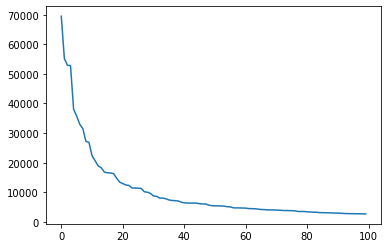

In [495]:
import matplotlib.pyplot as plt
%matplotlib inline
first_100_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

Закон Хипса -- обратная сторона закона Ципфа. Он описывает, что чем больше корпус, тем меньше новых слов добавляется с добавлением новых текстов. В какой-то момент корпус насыщается.

## Задача

Обучение трех классификаторов: 

1) на токенах с высокой частотой 

2) на токенах со средней частотой 

3) на токенах с низкой частотой

Сравнить полученные результаты, оценить какие токены наиболее важные для классификации.

In [506]:
#длина словаря
len(freq_dict_sorted)

351123

In [507]:
freq_dict_sorted[:10]

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860)]

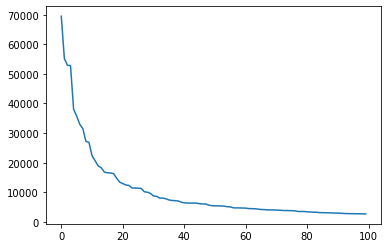

In [508]:
import matplotlib.pyplot as plt
%matplotlib inline
first_100_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

In [512]:
#словарь из самых частовстречающихся слов
first_freqs = [word for word, freq in freq_dict_sorted[:200]]
first_freqs[190:]

['школу', 'НЕ', 'весь', '1', 'мной', 'Если', 'жизнь', 'нравится', 'ж', 'болит']

In [513]:
# слова самой низкой частотности
last_freqs = [word for word, freq in freq_dict_sorted[2000:]]
last_freqs[:10]

['пахнет',
 'едем',
 'Скорее',
 'фак',
 'заходит',
 'учителя',
 'Сука',
 'группе',
 'красота',
 'нафиг']

In [514]:
# слова средней частотности
med_freqs = [word for word, freq in freq_dict_sorted[200:2000]]
med_freqs[:10]

['DD',
 'мама',
 'хотя',
 'Хочу',
 'одна',
 'человек',
 'эти',
 'думаю',
 'вроде',
 'них']

In [515]:
def max_len_tokens(df):
    max_len = 0
    for text in df:
        tokens = nltk.word_tokenize(text.lower())
        if len(tokens) > max_len:
            max_len = len(tokens)
    return max_len

In [516]:
#max_len_tokens(df.text)

In [517]:
max_len = 131

In [518]:
import numpy as np

def text_to_freqs(text, vocabulary):
    result = ''
    tokens = nltk.word_tokenize(text.lower())
    tokens_filtered = [word for word in tokens if word.isalnum()]
    for word in tokens_filtered:
        if word in vocabulary:
            result += word
            result += ' '

    return result

## Расчет для самых частотных слов

In [473]:
vocabulary = first_freqs

In [474]:
vocabulary[:10]

['не', 'и', 'в', 'я', 'RT', 'на', 'http', 'что', 'с', 'а']

In [377]:
%%time
x_train_vocab = np.asarray([text_to_freqs(text, vocabulary) for text in x_train])
x_test_vocab = np.asarray([text_to_freqs(text, vocabulary) for text in x_test])

CPU times: user 33.2 s, sys: 24 ms, total: 33.2 s
Wall time: 33.2 s


In [378]:
x_train_vocab

array(['блин я пока этот а до школы совсем не будет ',
       'чем я тем экзамен ',
       'сегодня было вообще это наш последний год поэтому я этот день http ',
       ..., 'то чувство когда завтра все в школу а я нет ',
       'не ну люблю тебя моя ',
       'можно я а там об этом по всем завтра в будет что люди '],
      dtype='<U121')

In [379]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train_vocab)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test_vocab))
print(classification_report(pred, y_test))

/home/ekaterina/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.63      0.69      0.66     25266
    positive       0.73      0.67      0.70     31443

    accuracy                           0.68     56709
   macro avg       0.68      0.68      0.68     56709
weighted avg       0.69      0.68      0.68     56709



## Расчет для слов средней частоты

In [475]:
vocabulary = med_freqs
vocabulary[:10]

['спокойно',
 'детей',
 'тупо',
 'любимой',
 'какого',
 'аааа',
 'первая',
 'надоело',
 'мозг',
 'рад']

In [406]:
%%time
x_train_vocab = np.asarray([text_to_freqs(text, vocabulary) for text in x_train])
x_test_vocab = np.asarray([text_to_freqs(text, vocabulary) for text in x_test])

KeyboardInterrupt: 

In [350]:
x_train_vocab

array(['блин http ', 'я что хоть ты по мне в ',
       'жаль что я не могу свою ', ...,
       'были на у себя опять как но я думаю мы ему ', '', 'в http '],
      dtype='<U121')

In [351]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train_vocab)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test_vocab))
print(classification_report(pred, y_test))

/home/ekaterina/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.63      0.69      0.66     25526
    positive       0.73      0.67      0.70     31183

    accuracy                           0.68     56709
   macro avg       0.68      0.68      0.68     56709
weighted avg       0.68      0.68      0.68     56709



## Расчет для наименее частотных слов

In [ ]:
vocabulary = last_freqs

In [ ]:
%%time
x_train_vocab = np.asarray([text_to_freqs(text, vocabulary) for text in x_train])
x_test_vocab = np.asarray([text_to_freqs(text, vocabulary) for text in x_test])

In [ ]:
x_train_vocab

In [ ]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train_vocab)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test_vocab))
print(classification_report(pred, y_test))

### Оставим пунктуацию

In [519]:
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     28092
    positive       1.00      1.00      1.00     28617

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



Стоило оставить пунктуацию

## Задача: найти фичи с наибольшей значимостью, и вывести их

In [521]:
features = vec.get_feature_names_out(bow)
features[:10]

array(['!', '#', '$', '%', '&', "'", "''", '(', ')', '*'], dtype=object)

In [522]:
coefficients = clf.coef_[0]
coefficients[:10]

array([ 1.18068646e-01,  3.83728879e-01, -1.07315796e-01,  1.38354974e+00,
       -3.60470731e-01,  3.02508022e-03,  3.38369693e-03, -5.97609517e+01,
        5.83164395e+01,  7.19207307e+00])

In [523]:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': np.abs(coefficients)})

In [526]:
feature_importance = feature_importance.sort_values('Importance', ascending=False)

In [528]:
feature_importance[:10]

,Feature,Importance
7,(,59.760952
8,),58.316439
43454,d,26.821647
101355,|,11.246174
44881,dd,10.617428
179734,о_о,10.599915
29398,^_^,9.024994
77506,o_o,8.780190
131,-/,8.658823
44890,ddd,7.917141


<AxesSubplot:ylabel='Feature'>

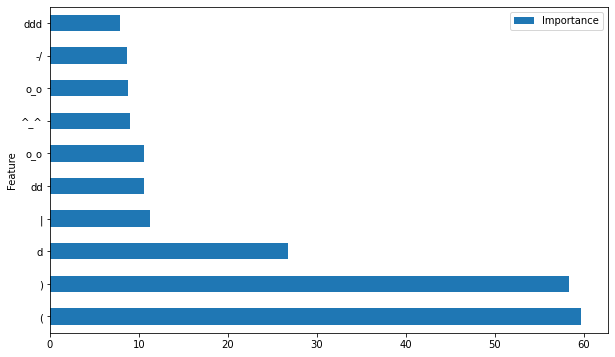

In [529]:
feature_importance[:10].plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

Посмотрим, как один из супер-значительных токенов справится с классификацией безо всякого машинного обучения:

In [531]:
cool_token = ')'
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      0.85      0.92     32969
    positive       0.83      1.00      0.91     23740

    accuracy                           0.92     56709
   macro avg       0.92      0.93      0.91     56709
weighted avg       0.93      0.92      0.92     56709



Вывод: самые значимые токены ')' и  '('

## Символьные n-граммы

Теперь в качестве фичей используем, например, униграммы символов:

In [ ]:
vec = CountVectorizer(analyzer='char', ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

             precision    recall  f1-score   support

   negative       0.99      1.00      1.00     27667
   positive       1.00      0.99      1.00     29042

avg / total       1.00      1.00      1.00     56709



В общем-то, теперь уже понятно, почему на этих данных здесь 1. Так или инчае, на символах классифицировать тоже можно: для некторых задач (например, для определения языка) фичи-символьные n-граммы решительно рулят.

Ещё одна замечательная особенность фичей-символов: токенизация и лемматизация не нужна, можно использовать такой подход для языков, у которых нет готвых анализаторов.

### Задача 3.

1) сравнить count/tf-idf/hashing векторайзеры/полносвязанную сетку (построить classification_report)

2) подобрать оптимальный размер для hashing векторайзера 

3) убедиться что для сетки нет переобучения

In [22]:
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     27983
    positive       1.00      1.00      1.00     28726

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



In [23]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

/home/ekaterina/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     28049
    positive       1.00      1.00      1.00     28660

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



In [24]:
from sklearn.feature_extraction.text import HashingVectorizer

In [25]:
vec = HashingVectorizer(n_features=2**5,)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.52      0.55      0.53     26335
    positive       0.59      0.55      0.57     30374

    accuracy                           0.55     56709
   macro avg       0.55      0.55      0.55     56709
weighted avg       0.56      0.55      0.55     56709



Вывод: hashvectorizer справляется с задачей хуже, чем count и tfidf. Нужно подбирать оптимальный размер признакового пространства.

In [11]:
import torch

In [41]:
max_words = 2000
max_len = 20
num_classes = 1

# Training
epochs = 20
batch_size = 512
print_batch_n = 100

In [13]:
import pandas as pd

In [14]:
df.head()

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",positive
1,"Да, все-таки он немного похож на него. Но мой ...",positive
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,positive
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",positive
4,@irina_dyshkant Вот что значит страшилка :D\nН...,positive


In [15]:
df.loc[df['label'] == 'positive', 'label'] = 0
df.loc[df['label'] == 'negative', 'label'] = 1

In [16]:
df.head()

,text,label
0,"@first_timee хоть я и школота, но поверь, у на...",0
1,"Да, все-таки он немного похож на него. Но мой ...",0
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,0
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",0
4,@irina_dyshkant Вот что значит страшилка :D\nН...,0


In [17]:
df['label'].unique()

array([0, 1], dtype=object)

In [18]:
df_train, df_val = train_test_split(df, test_size=0.3, random_state = 21)

In [19]:
df_train['label'].value_counts()

0    80379
1    78404
Name: label, dtype: int64

In [20]:
df_val['label'].value_counts()

0    34532
1    33519
Name: label, dtype: int64

In [21]:
from string import punctuation
from stop_words import get_stop_words
from pymorphy2 import MorphAnalyzer
import re

In [22]:
sw = set(get_stop_words("ru"))

In [23]:
puncts = set(punctuation)
puncts

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [24]:
morpher = MorphAnalyzer()


def preprocess_text(txt):
    txt = str(txt)
    txt = "".join(c for c in txt if c not in puncts or c == ')' or c == '(')
    txt = txt.lower()
#     txt = re.sub("no\s", "not", 'nore', txt)
    txt = [morpher.parse(word)[0].normal_form for word in txt.split() if word not in sw]
    for word in txt:
        if '@' in word:
            txt.remove(word)
    return " ".join(txt)

In [25]:
from tqdm import tqdm 
tqdm.pandas()

df_train['text'] = df_train['text'].progress_apply(preprocess_text)
df_val['text'] = df_val['text'].progress_apply(preprocess_text)

100%|██████████| 68051/68051 [00:41<00:00, 1626.73it/s]


In [26]:
train_corpus = " ".join(df_train["text"])
train_corpus = train_corpus.lower()

In [27]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

tokens = word_tokenize(train_corpus)

[nltk_data] Downloading package punkt to /home/ekaterina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
tokens_filtered = [word for word in tokens if word.isalnum()]

In [29]:
from nltk.probability import FreqDist

dist = FreqDist(tokens_filtered)
tokens_filtered_top = [pair[0] for pair in dist.most_common(max_words-1)]  # вычитание 1 для padding
len(tokens_filtered_top)

1999

In [30]:
vocabulary = {v: k for k, v in dict(enumerate(tokens_filtered_top, 1)).items()}
vocabulary

{'rt': 1,
 'd': 2,
 'хотеть': 3,
 'знать': 4,
 'завтра': 5,
 'новый': 6,
 'мочь': 7,
 'любить': 8,
 'мой': 9,
 'вообще': 10,
 'день': 11,
 'делать': 12,
 'хороший': 13,
 'смотреть': 14,
 'думать': 15,
 'блин': 16,
 'идти': 17,
 'самый': 18,
 'спать': 19,
 '3': 20,
 'сидеть': 21,
 'один': 22,
 'дом': 23,
 '2': 24,
 'утро': 25,
 'пойти': 26,
 'сделать': 27,
 'писать': 28,
 'друг': 29,
 'такой': 30,
 'мама': 31,
 'настроение': 32,
 'школа': 33,
 'человек': 34,
 'час': 35,
 'ждать': 36,
 'любимый': 37,
 'говорить': 38,
 'написать': 39,
 'никто': 40,
 'последний': 41,
 'хотеться': 42,
 'посмотреть': 43,
 'свой': 44,
 'видеть': 45,
 'добрый': 46,
 'ночь': 47,
 'прийти': 48,
 'работа': 49,
 'какой': 50,
 'болеть': 51,
 'купить': 52,
 'чтоть': 53,
 'найти': 54,
 'вчера': 55,
 'скоро': 56,
 'понять': 57,
 'неделя': 58,
 'плохо': 59,
 'давать': 60,
 'понимать': 61,
 '9': 62,
 'снег': 63,
 'читать': 64,
 'первый': 65,
 'фильм': 66,
 'оо': 67,
 'домой': 68,
 'голова': 69,
 'забыть': 70,
 'стать': 

In [31]:
import numpy as np


def text_to_sequence(text, maxlen):
    result = []
    tokens = word_tokenize(text.lower())
    tokens_filtered = [word for word in tokens if word.isalnum()]
    for word in tokens_filtered:
        if word in vocabulary:
            result.append(vocabulary[word])

    padding = [0] * (maxlen-len(result))
    return result[-maxlen:] + padding

In [32]:
%%time
x_train = np.asarray([text_to_sequence(text, max_len) for text in df_train["text"]])
x_val = np.asarray([text_to_sequence(text, max_len) for text in df_val["text"]])

CPU times: user 13.7 s, sys: 48 ms, total: 13.7 s
Wall time: 13.7 s


In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, vocab_size=2000, embedding_dim=128, out_channel=128, num_classes=1):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv_1 = nn.Conv1d(embedding_dim, out_channel, kernel_size=2)
        self.conv_2 = nn.Conv1d(embedding_dim, out_channel, kernel_size=3)
        self.pool = nn.MaxPool1d(2)
        self.relu = nn.ReLU()
        self.linear_1 = nn.Linear(out_channel, out_channel // 2)
        self.linear_2 = nn.Linear(out_channel // 2, num_classes)
        
    def forward(self, x):        
        output = self.embedding(x) # B, L, E
        #                       B  E  L         
        output = output.permute(0, 2, 1)
        output = self.conv_1(output)
        output = self.relu(output)
        output = self.pool(output)

        output = self.conv_2(output)
        output = self.relu(output)
        output = self.pool(output)
        output = torch.max(output, axis=2).values
        output = self.linear_1(output)
        output = self.relu(output)
        output = self.linear_2(output)
        output = F.sigmoid(output)
        return output

In [34]:
from torch.utils.data import DataLoader, Dataset


class DataWrapper(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).long()
        self.target = torch.from_numpy(target).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        
        if self.transform:
            x = self.transform(x)
            
        return x, y
    
    def __len__(self):
        return len(self.data)

In [35]:
df_train['label'] = df_train['label'].astype(int)
df_val['label'] = df_val['label'].astype(int)

In [36]:
train_dataset = DataWrapper(x_train, df_train['label'].values)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = DataWrapper(x_val, df_val['label'].values)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)

In [37]:
model = Net(vocab_size=max_words)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [38]:
print(model)
print("Parameters:", sum([param.nelement() for param in model.parameters()]))

Net(
  (embedding): Embedding(2000, 128)
  (conv_1): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
  (conv_2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU()
  (linear_1): Linear(in_features=128, out_features=64, bias=True)
  (linear_2): Linear(in_features=64, out_features=1, bias=True)
)
Parameters: 346497


In [39]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01 )
criterion = nn.BCELoss()

In [42]:
model = model.to(device)
model.train()
th = 0.5

train_loss_history = []
test_loss_history = []


for epoch in range(epochs):  
    running_items, running_right = 0.0, 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # обнуляем градиент
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()

        # подсчет ошибки на обучении
        loss = loss.item()
        running_items += len(labels)
        # подсчет метрики на обучении
        pred_labels = torch.squeeze((outputs > th).int())
        running_right += (labels == pred_labels).sum()
        
    # выводим статистику о процессе обучения
    model.eval()
    
    print(f'Epoch [{epoch + 1}/{epochs}]. ' \
            f'Step [{i + 1}/{len(train_loader)}]. ' \
            f'Loss: {loss:.3f}. ' \
            f'Acc: {running_right / running_items:.3f}', end='. ')
    running_loss, running_items, running_right = 0.0, 0.0, 0.0
    train_loss_history.append(loss)

        # выводим статистику на тестовых данных
    test_running_right, test_running_total, test_loss = 0.0, 0.0, 0.0
    for j, data in enumerate(val_loader):
        test_labels = data[1].to(device)
        test_outputs = model(data[0].to(device))
        
        # подсчет ошибки на тесте
        test_loss = criterion(test_outputs, test_labels.float().view(-1, 1))
        # подсчет метрики на тесте
        test_running_total += len(data[1])
        pred_test_labels = torch.squeeze((test_outputs > th).int())
        test_running_right += (test_labels == pred_test_labels).sum()
    
    test_loss_history.append(test_loss.item())
    print(f'Test loss: {test_loss:.3f}. Test acc: {test_running_right / test_running_total:.3f}')
    
    model.train()
        
print('Training is finished!')

Epoch [1/20]. Step [311/311]. Loss: 0.479. Acc: 0.766. Test loss: 0.716. Test acc: 0.690
Epoch [2/20]. Step [311/311]. Loss: 0.427. Acc: 0.781. Test loss: 0.468. Test acc: 0.686
Epoch [3/20]. Step [311/311]. Loss: 0.422. Acc: 0.797. Test loss: 0.432. Test acc: 0.683
Epoch [4/20]. Step [311/311]. Loss: 0.355. Acc: 0.812. Test loss: 1.913. Test acc: 0.680
Epoch [5/20]. Step [311/311]. Loss: 0.382. Acc: 0.824. Test loss: 2.295. Test acc: 0.679
Epoch [6/20]. Step [311/311]. Loss: 0.264. Acc: 0.834. Test loss: 0.945. Test acc: 0.681
Epoch [7/20]. Step [311/311]. Loss: 0.211. Acc: 0.844. Test loss: 0.514. Test acc: 0.679
Epoch [8/20]. Step [311/311]. Loss: 0.339. Acc: 0.853. Test loss: 0.275. Test acc: 0.673
Epoch [9/20]. Step [311/311]. Loss: 0.308. Acc: 0.859. Test loss: 1.468. Test acc: 0.679
Epoch [10/20]. Step [311/311]. Loss: 0.273. Acc: 0.866. Test loss: 0.652. Test acc: 0.675
Epoch [11/20]. Step [311/311]. Loss: 0.210. Acc: 0.872. Test loss: 2.909. Test acc: 0.671
Epoch [12/20]. Step

Вывод: сеть тренируется, но присутствует переобучение. Показатель accuracy растет на трейне, но не растет на тесте